In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
sns.set(style ='whitegrid', rc={'grid.linewidth':0.8})
#import some metrics and stats
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
#import model
from fbprophet import Prophet


### EDA on Road Safety Accident 2016

In [2]:
main = pd.read_csv('dftRoadSafety_Accidents_2016.csv')
pd.set_option("display.max_columns", 32)

C:\Users\Precious\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
main.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [4]:
#plt.figure(figsize=(10,5))
#ax = sns.countplot(x ='Number_of_Casualties',hue = 'Date', data=main, palette = 'prism')

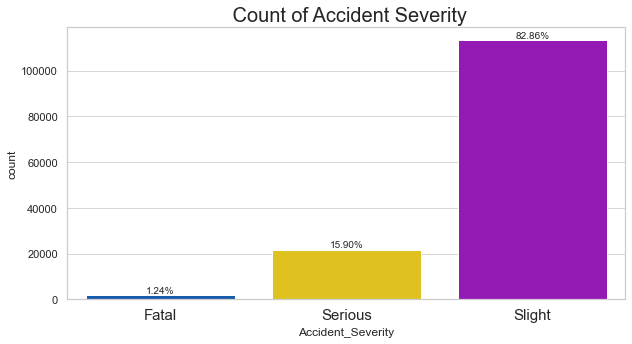

In [5]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x ='Accident_Severity', data=main, palette = 'prism')
plt.title(' Count of Accident Severity', fontsize = 20)
index = [0,1,2]
total = float(len(main))
plt.xticks(index,['Fatal','Serious','Slight'], fontsize = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}%'.format(100*(height/total)),
            ha="center") 
plt.show()

([<matplotlib.axis.XTick at 0x74144da860>,
 [Text(0, 0, 'Fatal'), Text(0, 0, 'Serious'), Text(0, 0, 'Slight')])

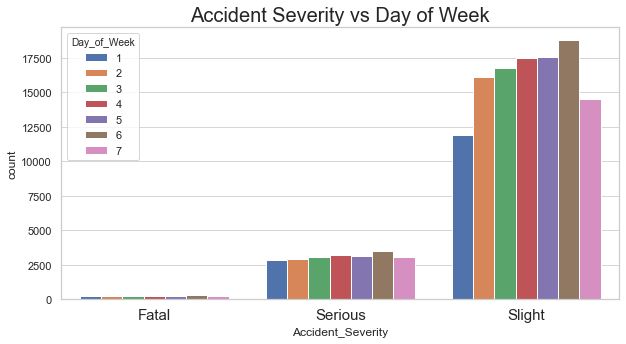

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Accident_Severity', hue = 'Day_of_Week', data = main, saturation=0.9)
plt.title('Accident Severity vs Day of Week', fontsize = 20)
index = [0,1,2]
plt.xticks(index,['Fatal','Serious','Slight'], fontsize = 15)

([<matplotlib.axis.XTick at 0x741457ff60>,
 [Text(0, 0, 'Sunday'),
  Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday')])

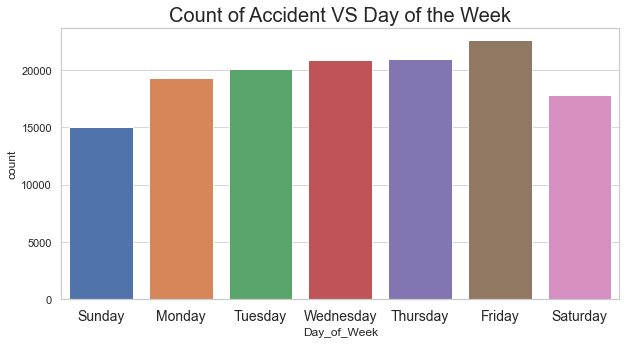

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Day_of_Week', data = main, saturation=0.9)
plt.title('Count of Accident VS Day of the Week', fontsize = 20)
index = [0,1,2,3,4,5,6,]
plt.xticks(index,['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], fontsize = 14)

From Both plots above-

Starting with Day of the week and from the plot we can tell that other than 
weekdays being on the highside, **friday** had the highest percentage of accident occurence which can be attributed to 
so many factors like travel, events/clubbing, etc.

([<matplotlib.axis.XTick at 0x7414616208>,
 [Text(0, 0, 'Fatal'), Text(0, 0, 'Serious'), Text(0, 0, 'Slight')])

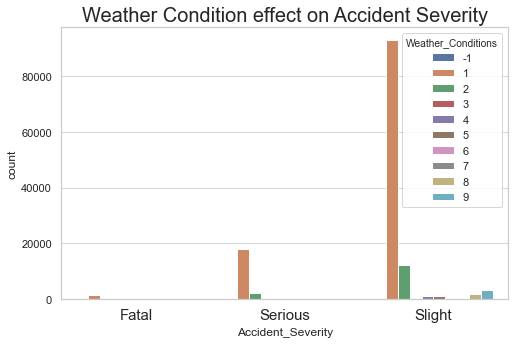

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Accident_Severity', data=main, hue = 'Weather_Conditions')
plt.title('Weather Condition effect on Accident Severity', fontsize=20)
index = [0,1,2]
plt.xticks(index,['Fatal','Serious','Slight'], fontsize = 15)

In [9]:
main['Weather_Conditions'].value_counts()

 1    112241
 2     14492
 9      3813
 8      2244
 5      1386
 4      1262
 7       745
 3       346
 6        79
-1        13
Name: Weather_Conditions, dtype: int64

([<matplotlib.axis.XTick at 0x741449beb8>,
 [Text(0, 0, 'Fine no high winds'),
  Text(0, 0, 'Raining no high winds'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, 'Other'),
  Text(0, 0, 'Snowing no high winds'),
  Text(0, 0, 'Raining + high winds'),
  Text(0, 0, 'Fine + high winds'),
  Text(0, 0, 'Snowing + high winds'),
  Text(0, 0, 'Fog or mist')])

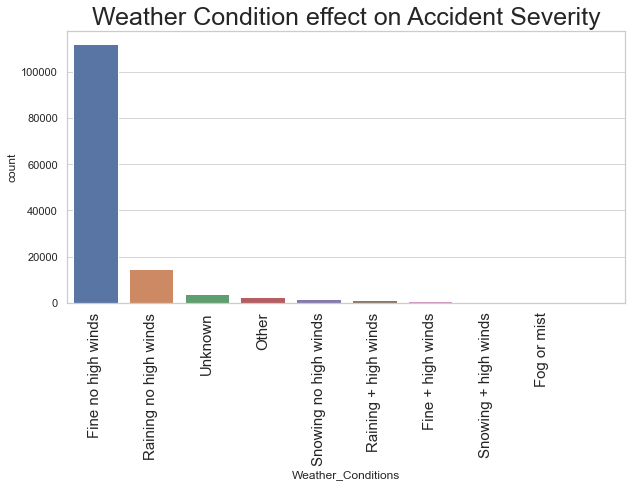

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Weather_Conditions', data=main,order = main['Weather_Conditions'].value_counts().index)
plt.title('Weather Condition effect on Accident Severity', fontsize=25)
index = [0,1,2,3,4,5,6,7,8]
plt.xticks(index,['Fine no high winds', 'Raining no high winds','Unknown','Other','Snowing no high winds',
                  'Raining + high winds','Fine + high winds', 'Snowing + high winds', 'Fog or mist'],fontsize = 15, rotation = 90)

([<matplotlib.axis.XTick at 0x7414eb1cf8>,
 [Text(0, 0, 'Fatal'), Text(0, 0, 'Serious'), Text(0, 0, 'Slight')])

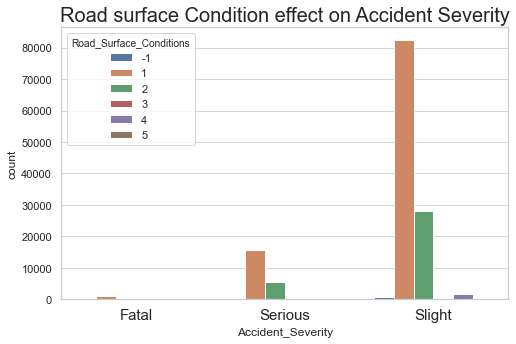

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Accident_Severity', data=main, hue = 'Road_Surface_Conditions')
plt.title('Road surface Condition effect on Accident Severity', fontsize = 20)
index = [0,1,2]
plt.xticks(index,['Fatal','Serious','Slight'], fontsize = 15)

From both plots, **Fine no high winds** i.e. clear weather conditions suggest having the highest severity cases, 
and it is followed with **raining no high winds**  conditions


This correlates to the below plot that shows accident severity occuring most on **dry surface** and a little on 
**wet or damp** surfaces

([<matplotlib.axis.XTick at 0x7414f3d470>,
 [Text(0, 0, 'Dry'),
  Text(0, 0, 'Wet or damp'),
  Text(0, 0, 'Frost or ice'),
  Text(0, 0, 'Snow'),
  Text(0, 0, 'Flood over 3cm. deep')])

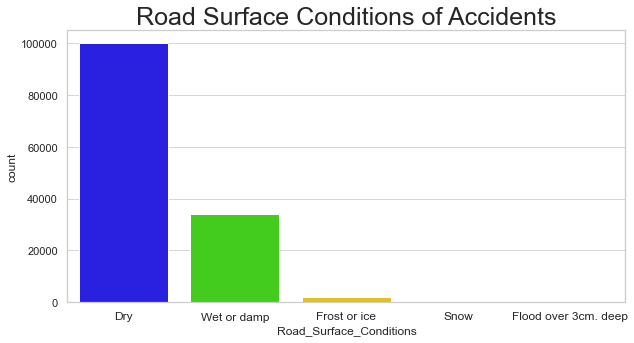

In [12]:
main['Road_Surface_Conditions']= main['Road_Surface_Conditions'].map(lambda x:1  if x == -1 else x)

plt.figure(figsize=(10,5))
index = [0,1,2,3,4]
sns.countplot(x= 'Road_Surface_Conditions', data = main, palette = 'prism', order = main['Road_Surface_Conditions'].value_counts().index)
plt.title('Road Surface Conditions of Accidents', fontsize = 25)
plt.xticks(index,['Dry', 'Wet or damp','Frost or ice','Snow', 'Flood over 3cm. deep'], fontsize = 12)                  

([<matplotlib.axis.XTick at 0x7414fb0978>,
 [Text(0, 0, 'Fatal'), Text(0, 0, 'Serious'), Text(0, 0, 'Slight')])

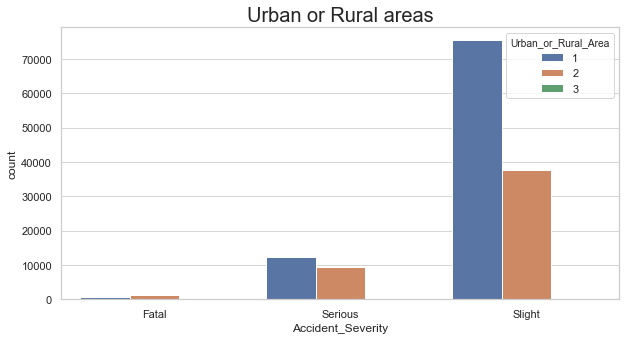

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Accident_Severity', data=main, hue = 'Urban_or_Rural_Area')
plt.title('Urban or Rural areas', fontsize = 20)
index = [0,1,2]
plt.xticks(index,['Fatal','Serious','Slight'])

**Urban** areas clearly show high accident cases when compared to **Rural** areas.

In [14]:
main.fillna(method='ffill',inplace=True)
main.to_csv('Time_series', index=False)

# Time Series 

In [15]:
Time_series = pd.read_csv('Time_series', infer_datetime_format=True, parse_dates={'datetime':[9,11]},
                 index_col=['datetime'], header = 0,)
pd.set_option("display.max_columns", 32)

In [16]:
Time_series

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 02:30:00,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
2016-01-11 00:37:00,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2016-01-11 01:25:00,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
2016-01-11 09:15:00,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
2016-01-11 07:53:00,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583
2016-01-11 09:29:00,2016010000019,530840.0,167100.0,-0.121004,51.387813,1,3,2,1,3,20,E09000008,3,23,6,30.0,3,4,6,0,0,8,1,1,1,0,0,1,1,E01001180
2016-01-11 08:53:00,2016010000020,527610.0,181430.0,-0.162234,51.517333,1,3,1,1,3,1,E09000033,5,0,6,30.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01004658
2016-01-11 10:05:00,2016010000021,523830.0,189460.0,-0.213859,51.590341,1,3,2,1,3,30,E09000003,3,504,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,1,E01000243
2016-01-11 09:51:00,2016010000023,524640.0,180620.0,-0.205302,51.510716,1,3,1,1,3,12,E09000020,4,450,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,1,E01002875


In [17]:
Time_series_2 = Time_series[['Accident_Index','Number_of_Casualties']]

In [18]:
Time_series_2.isna().sum()

Accident_Index          0
Number_of_Casualties    0
dtype: int64

In [19]:
Time_series_2.index = pd.to_datetime(Time_series.index)

In [20]:
Time_series_2.head()

,Accident_Index,Number_of_Casualties
datetime,,
2016-01-11 02:30:00,2016010000005,1
2016-01-11 00:37:00,2016010000006,1
2016-01-11 01:25:00,2016010000008,1
2016-01-11 09:15:00,2016010000016,1
2016-01-11 07:53:00,2016010000018,1


In [21]:
Time_series_2.index

DatetimeIndex(['2016-01-11 02:30:00', '2016-01-11 00:37:00',
               '2016-01-11 01:25:00', '2016-01-11 09:15:00',
               '2016-01-11 07:53:00', '2016-01-11 09:29:00',
               '2016-01-11 08:53:00', '2016-01-11 10:05:00',
               '2016-01-11 09:51:00', '2016-01-11 09:45:00',
               ...
               '2016-09-10 11:00:00', '2016-10-17 11:40:00',
               '2016-10-26 17:00:00', '2016-10-24 16:32:00',
               '2016-10-27 12:00:00', '2016-10-28 06:45:00',
               '2016-01-11 16:45:00', '2016-10-27 07:10:00',
               '2016-10-29 20:00:00', '2016-12-25 12:30:00'],
              dtype='datetime64[ns]', name='datetime', length=136621, freq=None)

In [22]:
#Downsampling to Daily data points
df_daily = Time_series_2.resample('D').mean()
print(df_daily.head())

            Number_of_Casualties
datetime                        
2016-01-01              1.468085
2016-01-02              1.274390
2016-01-03              1.352459
2016-01-04              1.415033
2016-01-05              1.428058


Text(0.5, 1.0, 'Downsampled Data')

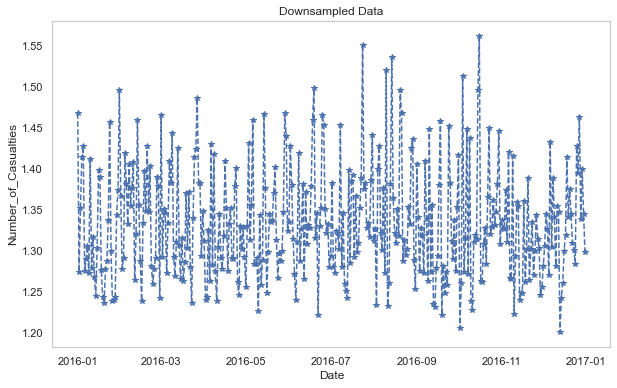

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Number_of_Casualties, '--',marker='*')
#plt.plot(df_daily, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Number_of_Casualties')
plt.title('Downsampled Data')  ## this is just trying out a visualization, more insights from the statistical test

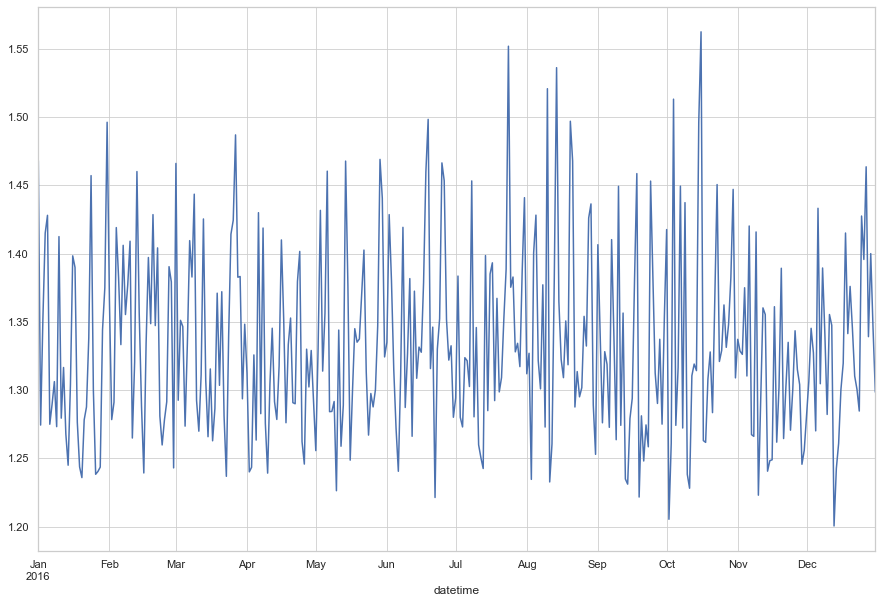

In [24]:
pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(15,10))

df_daily['Number_of_Casualties'].plot()


### Carrying out Smoothing

Using the knowledge of **Moving Average** We'll take the first 20 days to get better insights of the pattterns

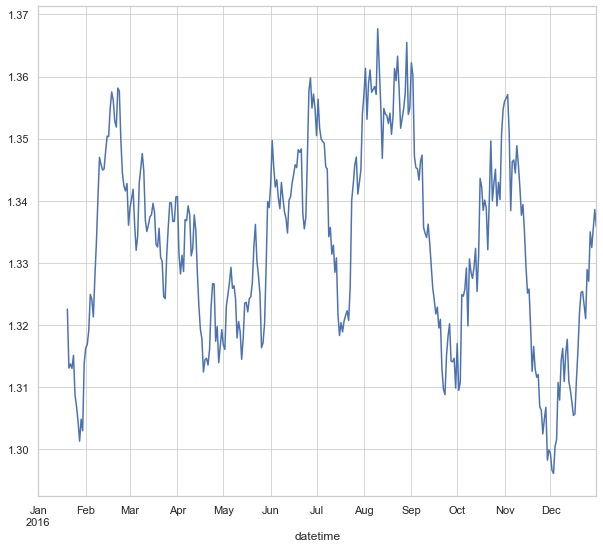

In [25]:
plt.figure(figsize=(10,9))
df_daily_mean = df_daily.rolling(window = 20).mean() # 
df_daily_mean['Number_of_Casualties'].plot()
 

### Desampling to Months to compare

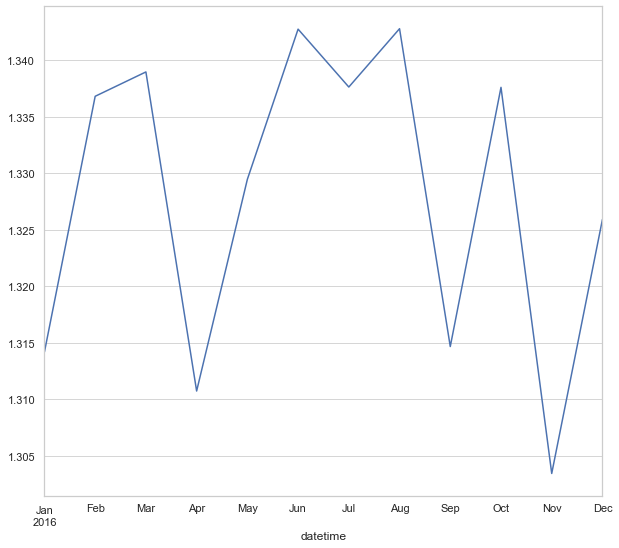

In [26]:
plt.figure(figsize=(10,9))
Time_series_2['Number_of_Casualties'].resample('M').mean().plot()


We can see that the months of **June - August** experienced high casualty cases

In [27]:
df_daily['Number_of_Casualties'].describe()

count    366.000000
mean       1.333877
std        0.068245
min        1.200456
25%        1.281252
50%        1.323089
75%        1.379171
max        1.562500
Name: Number_of_Casualties, dtype: float64

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDe

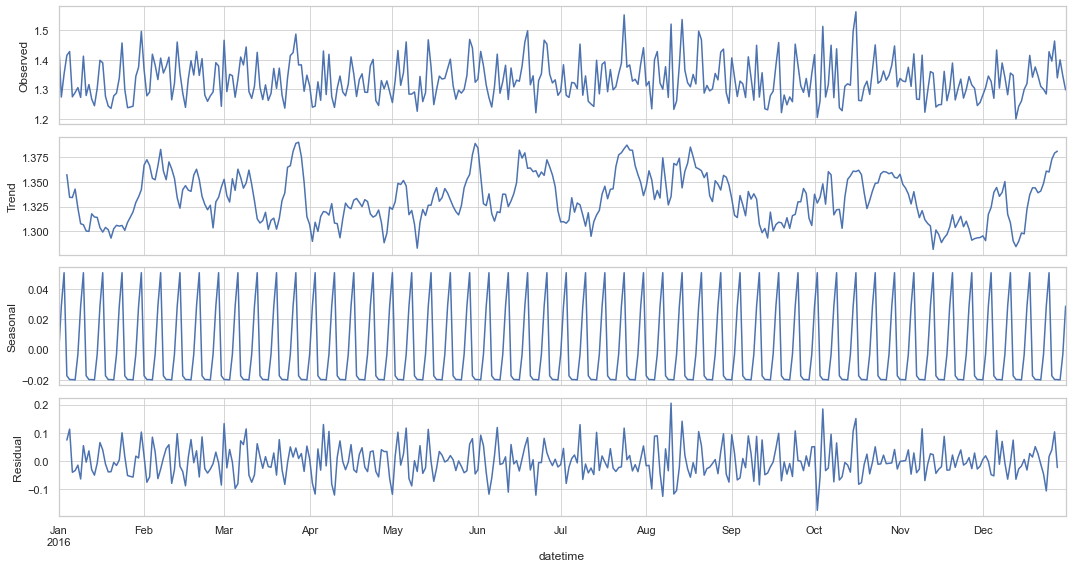

In [28]:

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['Number_of_Casualties'], model='additive')
decompose_series.plot()
plt.show()

## To confirm its Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller # using the adfuller test to tes for stationarity

adf_result = adfuller(df_daily['Number_of_Casualties'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.618616218726238
p-value: 1.1588635092512146e-06
No. of lags used: 7
No. of observations used : 358
Critical Values:
   1%: -3.448748905151901
   5%: -2.8696473721448728
   10%: -2.5710891239349585


A **P-value < 0.05** and an **ADF value less than the Critical values** shows the data is stationary, so we can continue

### Training and Forecasting Data

In [30]:
df_daily.tail()

,Number_of_Casualties
datetime,
2016-12-27,1.463602
2016-12-28,1.339161
2016-12-29,1.400000
2016-12-30,1.345382
2016-12-31,1.298507


In [31]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
Number_of_Casualties    366 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [32]:
df_daily.shape

(366, 1)

In [33]:
df_daily = df_daily.reset_index() 
df_daily.head()

,datetime,Number_of_Casualties
0,2016-01-01,1.468085
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058


In [34]:
df_daily = df_daily.rename(columns={"datetime": "ds", "Number_of_Casualties": "y"})
df_daily.head()

,ds,y
0,2016-01-01,1.468085
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058


### For the Training set, we will consider a period that spans from 1st  January 2016 to 12th December 2016

### And also for a Test set between the period of 13th December 2017 to 1st May 2017

In [35]:
train = df_daily[(df_daily['ds'] > '2016-01-01') & (df_daily['ds'] <= '2016-12-01')]

test = df_daily[(df_daily['ds'] > '2016-12-01')]

In [36]:
print(train.shape)
print('\n')
print(test.shape)

(335, 2)


(30, 2)


In [37]:
train.head()

,ds,y
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058
5,2016-01-06,1.275000


In [38]:
model = Prophet(weekly_seasonality=True, yearly_seasonality=True,seasonality_mode='multiplicative',
                daily_seasonality=True)

In [39]:
model.fit(train)

C:\Users\Precious\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [40]:
future_date = model.make_future_dataframe(periods=150, freq='D')
future_date.tail()

,ds
480,2017-04-26
481,2017-04-27
482,2017-04-28
483,2017-04-29
484,2017-04-30


In [41]:
forecast = model.predict(future_date)

### yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries



### here we can compare btw the predictions (yhat) and the trend and tell that their values are very close

In [42]:
forecast[['ds','yhat', 'trend', 'yhat_lower','yhat_upper', 'trend_lower', 'trend_upper']].head()

,ds,yhat,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
0,2016-01-02,1.370960,1.289695,1.292178,1.445940,1.289695,1.289695
1,2016-01-03,1.386262,1.289740,1.307047,1.463948,1.289740,1.289740
2,2016-01-04,1.314066,1.289784,1.234374,1.391852,1.289784,1.289784
3,2016-01-05,1.304694,1.289829,1.226798,1.379324,1.289829,1.289829
4,2016-01-06,1.305930,1.289873,1.226731,1.379380,1.289873,1.289873


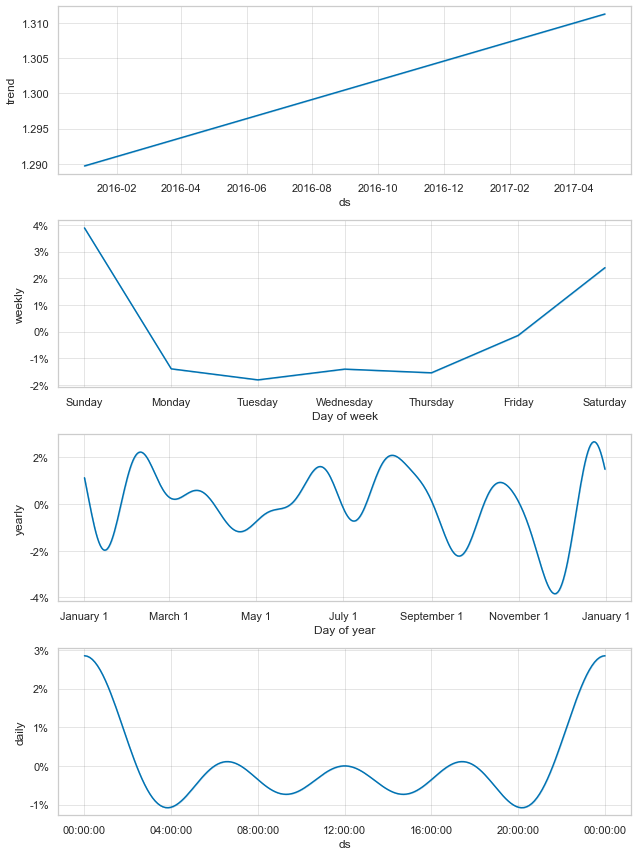

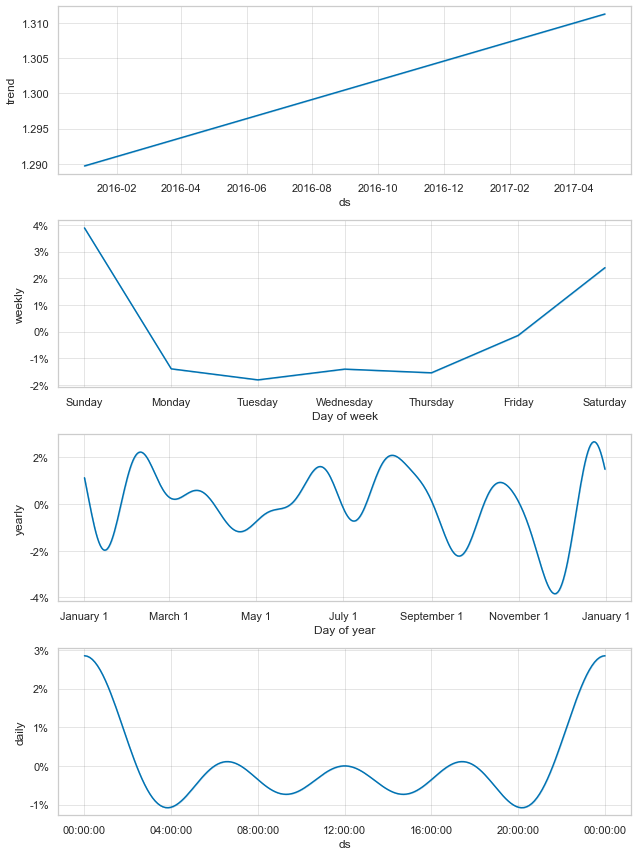

In [43]:
model.plot_components(forecast)

#### The plots shown above (component forcecast) can be seen in weeks, yearly (months of the year) and the trend it follows.

#### Let us look at a single forecast showing the aggregation of these observations

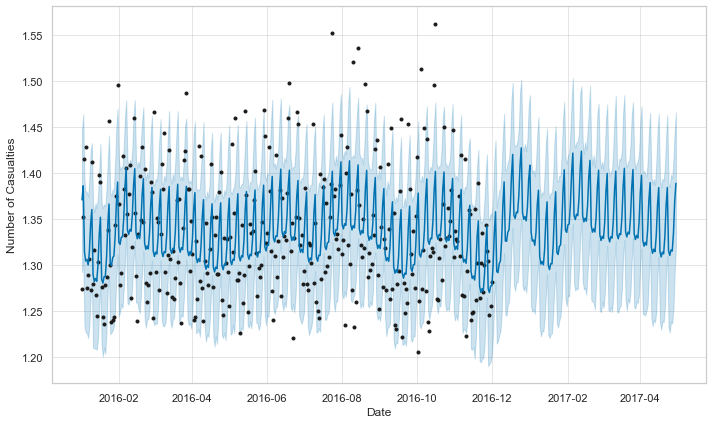

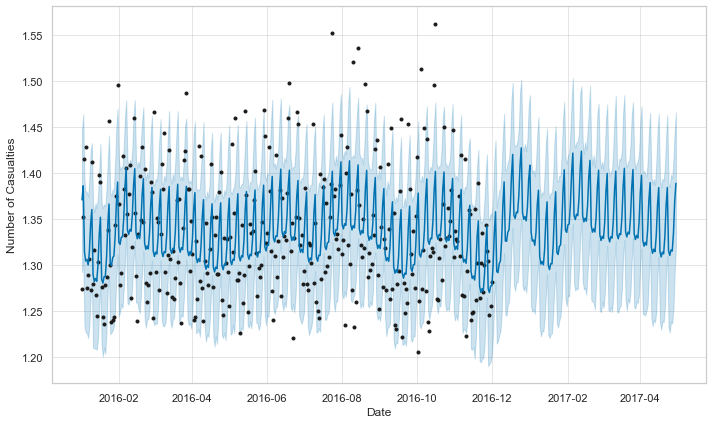

In [44]:
model.plot(forecast, ylabel='Number of Casualties', xlabel='Date', uncertainty=True)

### From this plot we can tell that addition of more features (regressors) will help with its accuracy, as the model
### learns better from more information than a single one.. But we are concerned with the period of accident severity 

In [45]:
comparison = forecast.set_index('ds')[['yhat']].join(train.set_index('ds')[['y']]).reset_index()

In [46]:
comparison # remember the 'yhat' rep Predicted value and 'y' from the trained data rep Actual value

,ds,yhat,y
0,2016-01-02,1.370960,1.274390
1,2016-01-03,1.386262,1.352459
2,2016-01-04,1.314066,1.415033
3,2016-01-05,1.304694,1.428058
4,2016-01-06,1.305930,1.275000
5,2016-01-07,1.300326,1.289641
6,2016-01-08,1.314812,1.306233
7,2016-01-09,1.344249,1.273224
8,2016-01-10,1.360483,1.412470
9,2016-01-11,1.289671,1.279452


### The NAN values are as a result of the dropped test data we did while splitting so we do 
### *Interpolation* to fill them up

In [47]:
comparison = comparison.interpolate(method='linear', limit_direction='forward')
comparison.isnull().sum()

ds      0
yhat    0
y       0
dtype: int64

Text(0, 0.5, 'Number of Casualties')

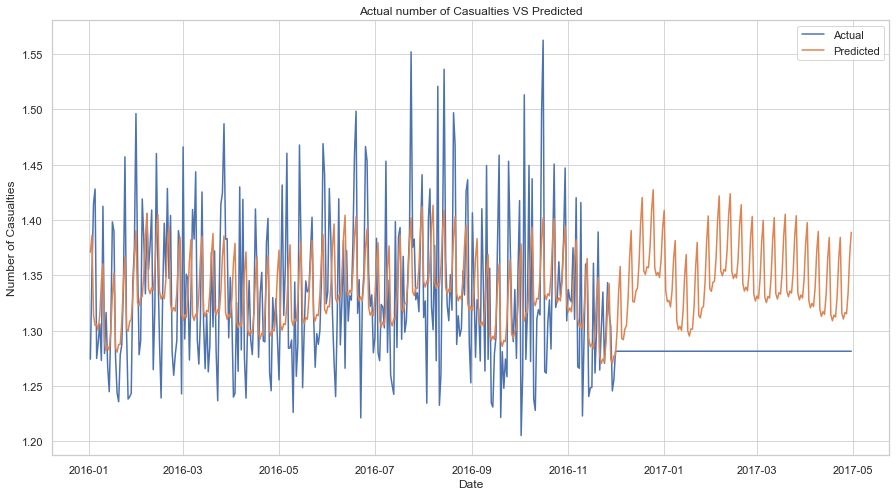

In [48]:
plt.plot(comparison.ds, comparison.y, label = 'Actual')
plt.plot(comparison.ds, comparison.yhat, label = 'Predicted')
plt.legend()
plt.title('Actual number of Casualties VS Predicted')
plt.xlabel('Date')
plt.ylabel('Number of Casualties')

### Checking some Metrics for performance

In [49]:
MAE (forecast.trend, forecast.yhat)

0.0396472664703303

In [50]:
MSE(forecast.trend, forecast.yhat)

0.002453528406604026

# Derivations from Findings !!!

### 1. First from the EDA we can see that: 

#####        ** Accident Severity showed about 83% for slight cases when compared to serious and fatal.
#####       **  Weekends (Thursday - Sunday) showed  high severity cases 
#####       ** These cases of accidents occured more during fine weather conditions and Urban areas were the most affected 

### 2. From the Time Series:

#####     ** There is an upward trend which shows a progressive state for accident occurence
#####     ** Like the EDA above, weekends showed high cases for accident occurence, peaking at friday and mild during (Monday - Thursday)
#####     ** Year --- Early (January - February) and Late (November - December) showed very high cases of accident casualties and was seen mild during the period of April -May and October.